# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_:  Uyangoren, Seanuel \
_Student No._: 2021-07208  \
_Section_: FX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:  11/23/2023, 1300H

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Seanuel Uyangoren

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

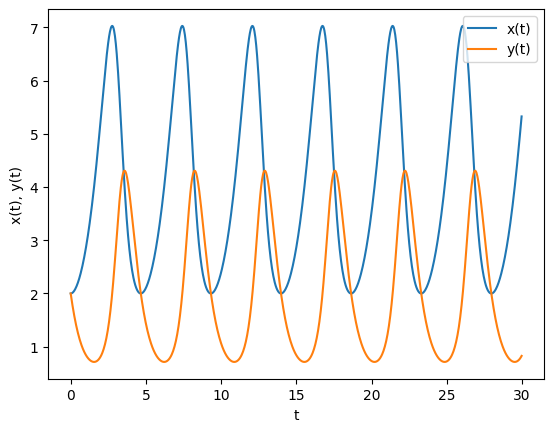

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define RHS of the differential equations
#This function returns an array containing dx/dt and dy/dt
#the parameter r contains both x and y values
def f(r, t):
  x = r[0]          #obtain the x values from r
  y = r[1]          #obtain the y values from r
  fx = alpha*x - beta*x*y
  fy = gamma*x*y - delta*y

  return np.array([fx, fy], float)

#define constants
alpha = 1
beta = 0.5
gamma  = 0.5
delta = 2

a = 0         #define lower limit of t
b = 30        #define upper limit of t
N = 1000      #1000 steps
h = (b-a)/N   #size of each step

tpoints = np.arange(a, b, h)      #create an array of 1000 points from 0 to 30 with increment h
xpoints = []                      #initialize blank array for x points
ypoints = []                      #initialize blank array for y points

#initial conditions
xinit = 2.0
yinit = 2.0

r = np.array([xinit, yinit], float)       #initial state vector r containing the initial conditions

#This is the main part of the Runge-Kutta method. At each t step, we determine the value of r
for t in tpoints:

  #append into xpoints and ypoints the current values of x and y in the current state of r before modifying r via RK4
  xpoints.append(r[0])
  ypoints.append(r[1])

  #RK4 equations. Note that when the function f is called, it returns an array
  k1 = h*f(r, t)
  k2 = h*f(r + 0.5*k1, t + 0.5*h)
  k3 = h*f(r + 0.5*k2, t + 0.5*h)
  k4 = h*f(r + k3, t + h)

  r = r + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

#plot
plt.plot(tpoints, xpoints, label = "x(t)")
plt.plot(tpoints, ypoints, label = "y(t)")
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.legend()

plt.show()


The plot describes the population of rabbits and foxes. It can be noted from the plot that the number of rabbits start to decrease when the foxes increase. This is because there are a lot of prey available that can sustain the survival of foxes. Hence, they are able to reproduce and multiply. However, then the number of rabbits are too low, the number of foxes start to decrease also, because there is less food for consumption. When the number of foxes are very low, there would be a few rabbits killed, hence, they  increase.

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


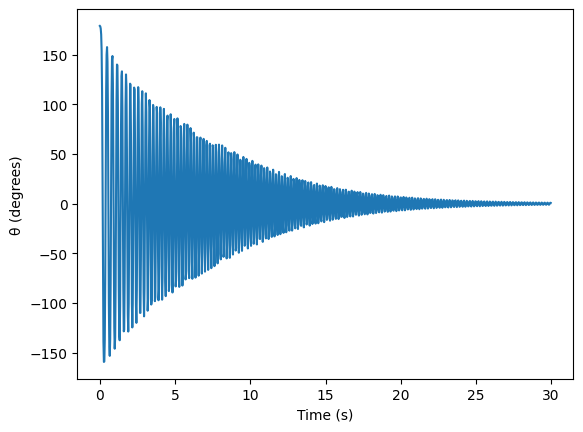

In [29]:
import numpy as np
import math

#define the functions. This function returns an array containing dθ/dt and dw/dt
def f(r,t):
  theta = r[0]
  omega = r[1]
  f_theta = omega
  f_omega = (-g/l) * math.sin(theta)

  return np.array([f_theta, f_omega], float)

#define constants
g = 9.81
l = 0.1


a = 0         #define lower limit of t
b = 10        #define upper limit of t
N = 100      #define number of steps
h = (b-a)/N   #define step size

tpoint = np.arange(a, b, h)     #create an array of 1000 points from 0 to 10 with increment h
theta_points = []                #initialize blank array for θ points
omega_points = []                 #initialize blank array for w points

#initial condition
theta_init = math.radians(179)      #convert degrees to radians
omega_init = 0.0

r = np.array([theta_init, omega_init], float)    #initial state vector r containing the initial conditions

#This is the main part of the Runge-Kutta method. At each t step, we determine the value of r
for t in tpoints:

  #append into xpoints and ypoints the current values of θ and w in the current state of r before modifying r via RK4
  theta_points.append(r[0])
  omega_points.append(r[1])

  #RK4 equations. Note that when the function f is called, it returns an array
  k1 = h*f(r, t)
  k2 = h*f(r + 0.5*k1, t + 0.5*h)
  k3 = h*f(r + 0.5*k2, t + 0.5*h)
  k4 = h*f(r + k3, t + h)

  r = r + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

theta_points_deg = np.degrees(theta_points)     #convert radians of the angle back to degrees

#plot
plt.plot(tpoints, theta_points_deg)
plt.xlabel("Time (s)")
plt.ylabel("θ (degrees)")

plt.show()


The plot shows the angular displacement of the pendulum. Since the oscillation is nonlinear, we can see how the amplitude decrease as time progresses.